In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

## Part 1

Solve the problem for a choice of $V_0 = 0$ and $V_N = 10$. Plots for 20 steps.

In [22]:
a,b = 0,10   ## Values of potential on boundary
N = 11       ## Number of steps we intend to take, which includes the last point
h = (b-a)/N  ## Step size

x = np.linspace(a,b,N)  ## Locations where we intend to solve the problem
V = np.zeros(N)         ## Place holder for V where all the guesses are zero

## Setting the boundary values
V[0] = a
V[N-1] = b

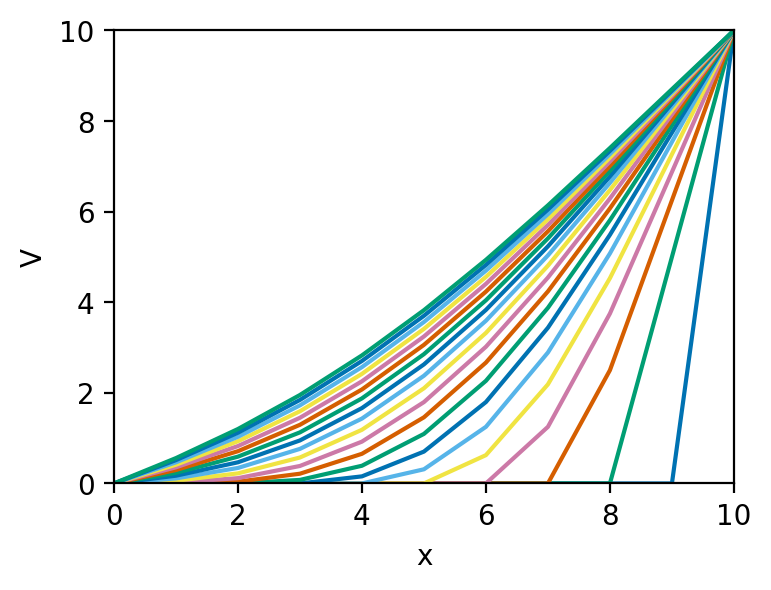

In [23]:
plt.figure(figsize = (4,3), dpi = 200)

plt.plot(x,V)


## Compute the averages for 20 iterations and plot each result showing convergence
for j in range(1,20):
    
    ## Compute the average (notice the end points are left out)
    for i in range(1,len(V)-1):

        V[i]=0.5*(V[i-1]+V[i+1])
    
    plt.plot(x,V)
    
plt.xlabel('x')
plt.ylabel('V')
plt.axis([x[0],x[N-1],V[0],V[N-1]]);

## Part 2
We make a function that will run the relaxation algorithm and run it for a variety of error levels

In [131]:
def RelaxV(a, b, N, max_iterations, err):
    
    h = (b-a)/N

    x = np.linspace(a,b,N)
    Vold = np.zeros(N)
    Vnew = np.zeros(N)
    Vold[0] = a
    Vold[N-1] = b
    Vnew[0] = a
    Vnew[N-1] = b

    Verr = 100*err

    Vnew = Vold + np.zeros(N)

    iteration = 0

    while Verr > err:

        for i in range(1,len(Vold)-1):

            Vnew[i] = 0.5*(Vold[i-1] + Vold[i+1])

        Verr = max(abs(Vnew-Vold))
        Vold = Vnew + np.zeros(N)
        iteration += 1
        
        if iteration > max_iterations:
            
            print('Convergence not acheived in', iteration, 'iterations.')
            return Vnew, x, iteration,
        
    return Vnew, x, iteration

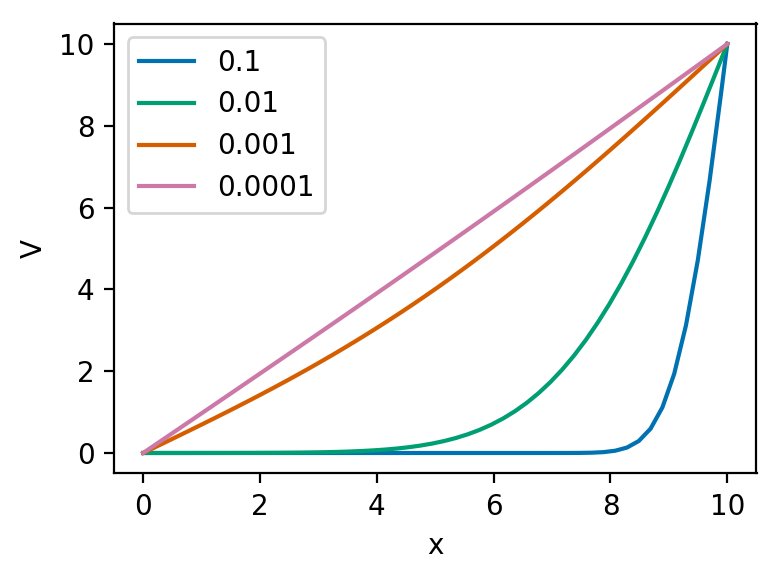

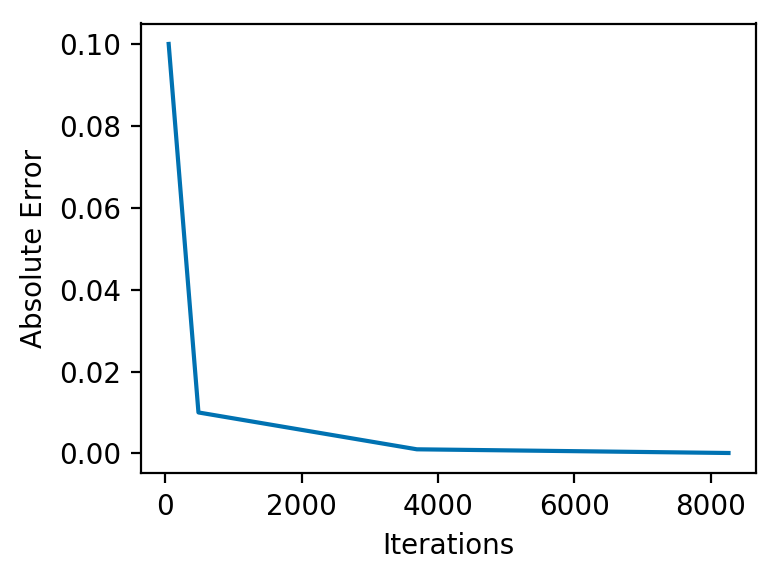

In [132]:
errList = [1e-1,1e-2,1e-3,1e-4]
VList = []
iList = []
imax = 1e5

a = 0
b = 10
N = 100

plt.figure(figsize = (4,3), dpi = 200)

for error in errList:
    
    V, x, iterations = RelaxV(a, b, N, max_iterations = imax, err = error)

    plt.plot(x,V)
    
    VList.append(V)
    iList.append(iterations)
    
plt.legend(errList)
plt.xlabel('x')
plt.ylabel('V')
plt.tight_layout()

plt.figure(figsize = (4,3), dpi = 200)
plt.plot(iList, errList)
plt.xlabel('Iterations')
plt.ylabel('Absolute Error')
plt.tight_layout()

## Part 3 Good vs Bad Guesses

We write a quick function to let us make guesses

In [129]:
def RelaxVwGuess(a, b, N, max_iterations, err, Vguess = np.zeros(N)):
    
    h = (b-a)/N

    x = np.linspace(a,b,N)
    Vold = Vguess
    Vnew = Vguess
    Vold[0] = a
    Vold[N-1] = b
    Vnew[0] = a
    Vnew[N-1] = b

    Verr = 100*err

    Vnew = Vold + np.zeros(N)

    iteration = 0

    while Verr > err:

        for i in range(1,len(Vold)-1):

            Vnew[i] = 0.5*(Vold[i-1] + Vold[i+1])

        Verr = max(abs(Vnew-Vold))
        Vold = Vnew + np.zeros(N)
        iteration += 1
        
        if iteration > max_iterations:
            
            print('Convergence not acheived in', iteration, 'iterations.')
            return Vnew, x, iteration,
        
    return Vnew, x, iteration

In [135]:
a = 0
b = 10
N = 100
error = 1e-3
imax = 1e5

VGuess = np.zeros(N)
V, x, iterations = RelaxVwGuess(a, b, N, max_iterations = imax, err = error, Vguess = VGuess)
print('All zeros to start coverges in', iterations, 'iterations')

VGuess = 10*np.ones(N)
V, x, iterations = RelaxVwGuess(a, b, N, max_iterations = imax, err = error, Vguess = VGuess)
print('All tens to start coverges in', iterations, 'iterations')

VGuess = 100*np.ones(N)
V, x, iterations = RelaxVwGuess(a, b, N, max_iterations = imax, err = error, Vguess = VGuess)
print('All 100s to start coverges in', iterations, 'iterations')

VGuess = 1000*np.ones(N)
V, x, iterations = RelaxVwGuess(a, b, N, max_iterations = imax, err = error, Vguess = VGuess)
print('All 1000s to start coverges in', iterations, 'iterations')

y = np.linspace(a,b,N)
VGuess = np.sin(y)
V, x, iterations = RelaxVwGuess(a, b, N, max_iterations = imax, err = error, Vguess = VGuess)
print('sin(x) to start coverges in', iterations, 'iterations')

y = np.linspace(a,b,N)
VGuess = np.cos(y)
V, x, iterations = RelaxVwGuess(a, b, N, max_iterations = imax, err = error, Vguess = VGuess)
print('cos(x) to start coverges in', iterations, 'iterations')


y = np.linspace(a,b,N)
VGuess = np.random.rand(N)
V, x, iterations = RelaxVwGuess(a, b, N, max_iterations = imax, err = error, Vguess = VGuess)
print('random, but small to start coverges in', iterations, 'iterations')

All zeros to start coverges in 3690 iterations
All tens to start coverges in 3690 iterations
All 100s to start coverges in 8263 iterations
All 1000s to start coverges in 12835 iterations
sin(x) to start coverges in 3738 iterations
cos(x) to start coverges in 3867 iterations
random, but small to start coverges in 8256 iterations


To achieve an absolute error less than 1e-3, we find that guesses that are in the neighborhood of the values of the potential boundaries coverge most quickly. Functions that behave poorly at the boundary are worse ($\sin$ and $\cos$). Even random values are converge! But really bad choices; like much larger than the scale of the problem and random choices are the worst choices. But a question is do those guesses give you the right answer or are the converging to bad solutions.

## Part 4 - Finding really bad choices?
We can see what happens when we make a really bad choice like $\sin$. It still converges.

3738  iterations


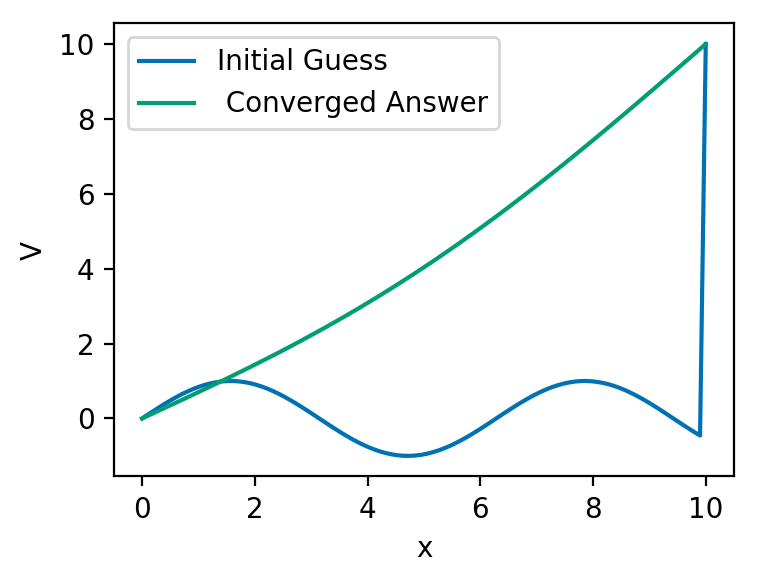

In [136]:
a,b = 0,10
N = 100
h = (b-a)/N

Vold = np.zeros(N)
Vnew = np.zeros(N)

x = np.linspace(a,b,N)
Vold = np.sin(x)
Vnew = Vold + np.zeros(N)

Vold[0] = a
Vold[N-1] = b
Vnew[0] = a
Vnew[N-1] = b

err = 1e-3

Verr = 1

k = 0

plt.figure(figsize = (4, 3), dpi = 200)
plt.plot(x,Vold)

while Verr > err:
    
    for i in range(1, N-1):
        
        Vnew[i] = 0.5*(Vold[i-1] + Vold[i+1])
        
    Verr = max(abs(Vnew-Vold))
    Vold = Vnew + np.zeros(N)
    k += 1

print(k, ' iterations')
plt.plot(x, Vnew)
plt.xlabel('x')
plt.ylabel('V')
plt.legend(['Initial Guess',' Converged Answer'])

Even random choices converge!

7013  iterations


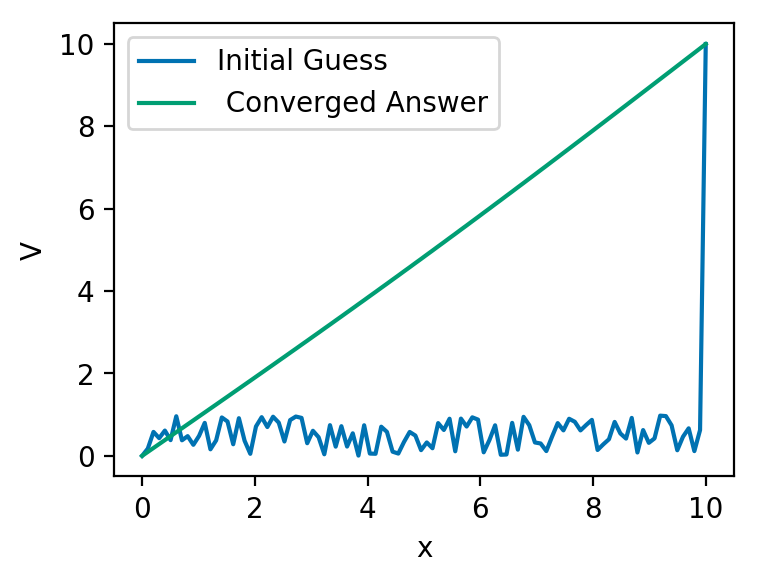

In [139]:
a,b = 0,10
N = 100
h = (b-a)/N

Vold = np.zeros(N)
Vnew = np.zeros(N)

x = np.linspace(a,b,N)
Vold = np.random.rand(N)
Vnew = Vold + np.zeros(N)

Vold[0] = a
Vold[N-1] = b
Vnew[0] = a
Vnew[N-1] = b

err = 1e-3

Verr = 1

k = 0

plt.figure(figsize = (4, 3), dpi = 200)
plt.plot(x,Vold)

while Verr > err:
    
    for i in range(1, N-1):
        
        Vnew[i] = 0.5*(Vold[i-1] + Vold[i+1])
        
    Verr = max(abs(Vnew-Vold))
    Vold = Vnew + np.zeros(N)
    k += 1

print(k, ' iterations')
plt.plot(x, Vnew)
plt.xlabel('x')
plt.ylabel('V')
plt.legend(['Initial Guess',' Converged Answer'])

11863  iterations


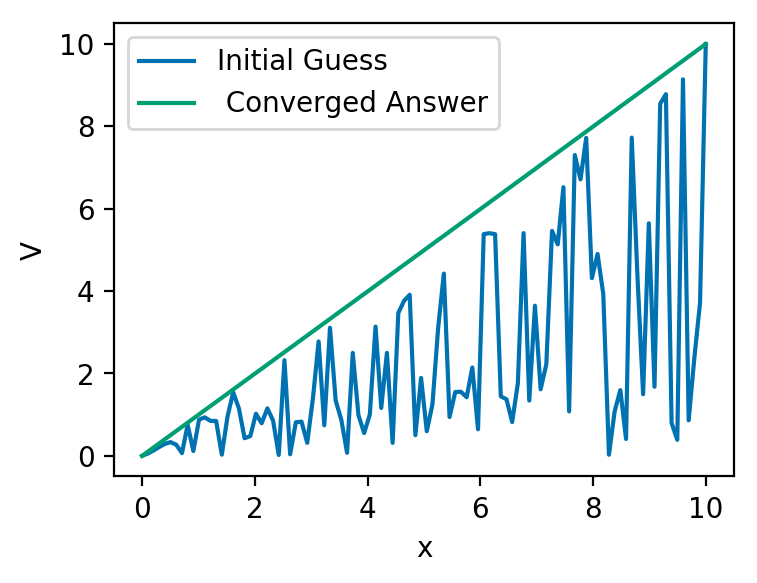

In [141]:
a,b = 0,10
N = 100
h = (b-a)/N

Vold = np.zeros(N)
Vnew = np.zeros(N)

x = np.linspace(a,b,N)
Vold = x*np.random.rand(N)
Vnew = Vold + np.zeros(N)

Vold[0] = a
Vold[N-1] = b
Vnew[0] = a
Vnew[N-1] = b

err = 1e-3

Verr = 1

k = 0

plt.figure(figsize = (4, 3), dpi = 200)
plt.plot(x,Vold)

while Verr > err:
    
    for i in range(1, N-1):
        
        Vnew[i] = 0.5*(Vold[i-1] + Vold[i+1])
        
    Verr = max(abs(Vnew-Vold))
    Vold = Vnew + np.zeros(N)
    k += 1

print(k, ' iterations')
plt.plot(x, Vnew)
plt.xlabel('x')
plt.ylabel('V')
plt.legend(['Initial Guess',' Converged Answer'])